In [3]:
import torch #基本モジュール
from torch.autograd import Variable #自動微分用
import torch.nn as nn #ネットワーク構築用
import torch.optim as optim #最適化関数
import torch.nn.functional as F #ネットワーク用の様々な関数
import torch.utils.data #データセット読み込み関連
import torchvision #画像関連
from torchvision import datasets, models, transforms #画像用データセット諸々

import numpy as np
import argparse
import json
from logging.config import dictConfig
from logging import getLogger
import os
import time
import matplotlib.pyplot as plt
export = "../report/2020_06_19"

In [6]:
a7 = [16.684378320935174, 18.959804963430642, 14.1776583109333, 27.14258923548165, 26.49871850972057, 26.286178658498468, 25.629805588547853, 24.46083640682628, 26.311183346877538, 31.54966556229293, 28.899168594111394, 29.768081515284116, 36.03175595424142, 42.37044445833594, 42.42045383509408, 47.18384697130712, 45.52103519409889, 46.715009064199535, 47.66518722260424, 49.48427830218166, 48.68412827405138, 50.290679502406704, 54.116396824404575, 56.5168469087954, 54.679002312933676, 57.50453209976871, 59.867475151590924, 58.50471963493155, 62.149152966181155, 57.72957429518035, 63.699443645683566, 63.85572294805276, 66.7000062511721, 67.36263049321748, 68.15652934925299, 67.46890041882853, 68.29405513533787, 67.93148715384135, 69.05669813089955, 70.57573294992811, 72.10101894105145, 72.38857285741076, 72.71988497843346, 72.76364318309683, 73.8388447833969, 72.88241545289742, 73.1574670250672, 74.78277176970683, 75.4266424954679, 74.95780458836032, 75.03281865349753, 75.94548977933363, 74.25767331374632, 74.43270613239983, 75.90798274676501, 76.89566793773832, 76.47683940738888, 77.11445896105519, 76.11427142589235, 76.35806713758829, 77.42076639369881, 77.45827342626743, 78.11464649621804, 77.93336250546977, 76.50809526786273, 78.4709633056198, 78.01462774270176, 77.11445896105519, 77.99587422641746, 77.05194724010752, 77.12071013314997, 77.8520972682378, 79.32737388260298, 76.8019003563168, 78.98355941739077, 76.57685816090518, 79.6149277989623, 78.20841407763956, 79.23985747327625, 79.21485278489718, 79.43989498030881, 78.48346564980933, 79.58992311058323, 78.63974495217853, 79.89623054322685, 79.49615552916171, 79.27736450584484, 80.2775520410077, 79.67118834781522, 78.67725198474714, 80.17128211539664, 79.60242545477277, 80.54010126898794, 79.55241607801463, 80.61511533412515, 80.26504969681815, 79.85872351065825, 80.1400262549228, 78.58973557542039, 79.38988560355067]
b7 = [15.515409139213602, 17.2032256048009, 17.115709195474153, 18.115896730636994, 21.278989810589486, 22.848034006376196, 22.74801525285991, 22.673001187722697, 21.04144527098831, 22.22291679689942, 21.32274801525286, 28.317809589297994, 38.55097830843283, 38.03213102456711, 49.1467150090642, 51.50340688879165, 52.7348877914609, 61.88660373820091, 62.18665999874977, 62.54297680815153, 65.93736325561042, 65.14971557166969, 67.03131837219479, 67.80021253985122, 67.50640745139714, 70.53822591735951, 72.33231230855786, 68.6191160842658, 72.33231230855786, 71.1195849221729, 75.97674563980746, 73.98262174157655, 73.24498343439394, 75.57041945364756, 74.35144089516784, 73.29499281115208, 74.17640807651435, 75.75170344439583, 74.75151590923298, 78.37094455210352, 77.13946364943426, 76.48934175157842, 78.35219103581922, 78.24592111020816, 78.32718634744015, 78.65849846846284, 78.61474026379946, 78.3959492404826, 78.73351253360005, 78.09589297993374, 79.02106644995936, 80.17128211539664, 78.16465587297618, 78.00212539851222, 81.07770206913797, 80.80265049696818, 81.62780521347753, 81.52153528786647, 81.71532162280428, 78.10839532412328, 82.39044820903919, 81.64655872976184, 81.20897668312809, 81.24023254360192, 81.62155404138277, 82.74051384634619, 82.22166656248046, 82.67175095330374, 81.6715634181409, 82.85303494405201, 82.87803963243108, 82.45921110208164, 82.62799274864037, 83.85322247921485, 82.19041070200663, 83.24685878602237, 83.30311933487529, 82.85928611614678, 82.94680252547353, 82.6780021253985, 82.79052322310433, 83.37188222791774, 82.66549978120898, 83.65318497218229, 83.86572482340439, 83.66568731637182, 83.21560292554854, 84.1532787397637, 82.40295055322873, 83.76570606988811, 84.29705569794336, 84.16578108395323, 84.55335375382884, 84.29705569794336, 84.3283115584172, 82.52172282302932, 84.32206038632243, 84.42207913983871, 84.23454397699568, 83.65943614427705]
c7 = [14.383946990060636, 14.383946990060636, 14.383946990060636, 25.679814965305994, 25.979871225854847, 25.72357316996937, 33.40626367443896, 28.136525598549728, 30.099393636306807, 32.26229918109645, 36.556854410201915, 37.65706069888104, 44.80840157529537, 44.40832656123023, 56.51059573670063, 60.82390448209039, 64.36206788772895, 60.480090016878165, 63.58692254797774, 68.9879352378571, 69.71307120085017, 67.456398074639, 67.05632306057386, 72.13227480152528, 74.42645496030505, 75.57667062574232, 70.73826342439207, 73.26373695067825, 77.27073826342439, 77.5582921797837, 75.83921985372257, 78.22091642182909, 78.76476839407388, 75.97674563980746, 72.70113146214915, 78.6084890917047, 79.02731762205414, 79.75870475714197, 80.915171594674, 74.35144089516784, 82.94680252547353, 82.65924860911421, 83.49690566981309, 79.22110395699194, 81.27148840407577, 82.70925798587236, 82.78427205100957, 81.96536850659498, 83.09683065574795, 82.85928611614678, 83.64068262799275, 84.82840532599863, 79.86497468275302, 84.24704632118522, 84.06576233043695, 82.51547165093454, 84.91592173532537, 82.54672751140839, 85.54729011689692, 82.96555604175784, 81.11520910170657, 85.71607176345564, 85.57229480527599, 85.07220103769457, 86.27242607988998, 84.75964243295618, 86.83503156841908, 85.80983934487716, 84.92217290742015, 83.01556541851598, 86.54122647996499, 85.40976433081202, 85.42226667500157, 85.44102019128587, 86.4224542101644, 86.0161280240045, 86.52872413577546, 84.872163530662, 84.57835844220791, 84.52834906544977, 85.83484403325623, 85.90985809839344, 86.53497530787023, 85.60355066574982, 86.9287991498406, 86.86003625679815, 86.27242607988998, 87.14759017315747, 86.84753391260861, 86.33493780083765, 86.33493780083765, 86.31618428455336, 86.24742139151091, 86.54747765205975, 85.4347690191911, 86.50371944739639, 86.40995186597488, 86.4037006938801, 86.82252922422954, 87.57266987560168]
# batch 64, epoch 100, lr 0.001, momentum 0.9, size 16000
m7 = [86.65] * 100

a5 = [25.7, 31.766666666666666, 34.81111111111111, 33.044444444444444, 38.77777777777778, 41.144444444444446, 39.51111111111111, 38.18888888888889, 47.03333333333333, 48.544444444444444, 51.0, 51.355555555555554, 52.62222222222222, 54.666666666666664, 58.51111111111111, 58.37777777777778, 58.67777777777778, 68.6, 65.0111111111111, 68.56666666666666, 72.81111111111112, 72.94444444444444, 72.5111111111111, 76.03333333333333, 72.81111111111112, 77.31111111111112, 77.3, 77.64444444444445, 79.4, 76.4, 77.97777777777777, 79.18888888888888, 79.25555555555556, 77.57777777777778, 79.54444444444445, 81.38888888888889, 80.53333333333333, 80.55555555555556, 81.43333333333334, 79.9, 82.32222222222222, 80.66666666666667, 82.13333333333334, 83.23333333333333, 82.43333333333334, 82.21111111111111, 82.33333333333333, 84.12222222222222, 81.44444444444444, 84.37777777777778, 82.3, 83.81111111111112, 83.71111111111111, 80.56666666666666, 84.32222222222222, 83.0111111111111, 84.0, 84.77777777777777, 85.86666666666666, 84.33333333333333, 83.74444444444444, 83.14444444444445, 85.35555555555555, 85.78888888888889, 85.04444444444445, 82.82222222222222, 84.56666666666666, 84.91111111111111, 84.2, 85.03333333333333, 86.42222222222222, 86.6, 85.66666666666667, 85.06666666666666, 85.86666666666666, 86.15555555555555, 85.8, 86.12222222222222, 86.23333333333333, 86.63333333333334, 85.53333333333333, 86.07777777777778, 86.8, 87.28888888888889, 85.95555555555555, 85.41111111111111, 86.37777777777778, 86.65555555555555, 86.57777777777778, 86.45555555555555, 86.16666666666667, 86.04444444444445, 86.95555555555555, 86.57777777777778, 86.56666666666666, 86.5111111111111, 86.21111111111111, 86.72222222222223, 85.75555555555556, 86.5]
b5 = [28.455555555555556, 28.6, 28.855555555555554, 32.37777777777778, 32.3, 25.622222222222224, 39.81111111111111, 43.477777777777774, 57.75555555555555, 60.2, 68.06666666666666, 75.66666666666667, 68.71111111111111, 77.44444444444444, 72.75555555555556, 80.55555555555556, 80.94444444444444, 80.03333333333333, 82.62222222222222, 84.21111111111111, 85.9, 85.26666666666667, 83.84444444444445, 85.95555555555555, 83.97777777777777, 87.38888888888889, 82.53333333333333, 85.25555555555556, 87.06666666666666, 87.31111111111112, 86.18888888888888, 87.94444444444444, 87.35555555555555, 84.42222222222222, 87.36666666666666, 85.71111111111111, 87.27777777777777, 87.43333333333334, 86.1, 89.23333333333333, 86.8, 88.84444444444445, 83.83333333333333, 88.14444444444445, 88.22222222222223, 88.4888888888889, 88.4888888888889, 87.81111111111112, 89.05555555555556, 89.38888888888889, 88.76666666666667, 87.05555555555556, 89.7, 89.85555555555555, 89.75555555555556, 90.33333333333333, 87.91111111111111, 86.57777777777778, 89.83333333333333, 88.12222222222222, 90.41111111111111, 90.45555555555555, 90.28888888888889, 90.65555555555555, 89.64444444444445, 89.45555555555555, 90.74444444444444, 89.81111111111112, 90.57777777777778, 90.11111111111111, 91.26666666666667, 89.45555555555555, 91.84444444444445, 91.18888888888888, 91.42222222222222, 89.27777777777777, 90.86666666666666, 91.17777777777778, 91.81111111111112, 90.67777777777778, 90.64444444444445, 91.77777777777777, 91.56666666666666, 91.46666666666667, 91.27777777777777, 91.11111111111111, 91.18888888888888, 92.43333333333334, 91.4, 91.32222222222222, 91.67777777777778, 91.92222222222222, 91.35555555555555, 91.34444444444445, 91.85555555555555, 92.06666666666666, 91.44444444444444, 91.46666666666667, 92.03333333333333, 91.15555555555555]
m5 = [69.2] * 100

m57 = [87.9] * 100

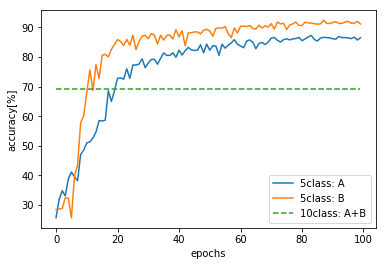

In [13]:
times = len(a5)
fig = plt.figure()
plt.plot(np.arange(times), a5, label="5class: A")
plt.plot(np.arange(times), b5, label="5class: B")
plt.plot(np.arange(times), m5, label="10class: A+B", linestyle="--")
# plt.plot(np.arange(times), n_y_acc, label="exp2:step4", linestyle="--")
# plt.plot(np.arange(times), b_x_acc, label="exp3", linewidth = 2)
plt.xlabel("epochs")
plt.ylabel("accuracy[%]")
plt.legend()
plt.show()
fig.savefig(os.path.join(export, "accuracy5.png"))

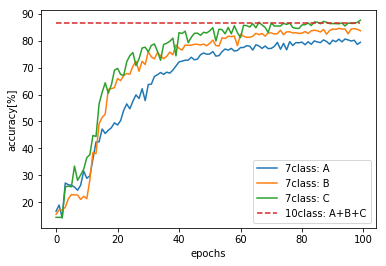

In [12]:
times = len(a7)
fig = plt.figure()
plt.plot(np.arange(times), a7, label="7class: A")
plt.plot(np.arange(times), b7, label="7class: B")
plt.plot(np.arange(times), c7, label="7class: C")
plt.plot(np.arange(times), m7, label="10class: A+B+C", linestyle="--")
# plt.plot(np.arange(times), n_y_acc, label="exp2:step4", linestyle="--")
# plt.plot(np.arange(times), b_x_acc, label="exp3", linewidth = 2)
plt.xlabel("epochs")
plt.ylabel("accuracy[%]")
plt.legend()
plt.show()
fig.savefig(os.path.join(export, "accuracy7.png"))